## 2. 분산분석(ANOVA)
+ T-검정이 두 집단 간의 평균 차이를 비교하는 통계분석 방법이라면 분산분석은 두 개 이상의 다수 집단 간 평균을 비교하는 통계분석 방법이다.
+ 분산분석은 개수에 따라 일원배치, 이원배치, 다원배치 분산분석으로 나누어진다.

### 2.1 분산분석의 개념
+ 분산분석은 두 개 이상의 집단에서 그룹 평균 간 차이를 그룹 내 변동에 비교하여 살펴보는 통계 분석 방법이다.
+ 즉, 두 개 이상 집단들의 평균 간 차이에 대한 통계적 유의성을 검증하는 방법이다.
+ 분산분석의 종류는 다음과 같다.

|분석 구분|분석 명칭|독립변수 개수|종속변수 개수|
|:------:|:---:|:---:|:-----:|
|단일변량 분산분석|일원배치 분산분석| 1개  | 1개 |
||이원배치 분산분석|2개||
||다원배치 분산분석|3개 이상||
|다변량 분산분석|MANOVA|1개 이상|2개 이상|


### 2.2 일원배치 분산분석 (One-way ANOVA)

#### 2.2.1 일원배치 분산분석의 개념
+ 분산분석에서 반응값에 대한 하나의 범주형 변수의 영향을 알아보기 위해 사용되는 검증 방법이다.
+ 모집단의 수에는 제한이 없으며, 각 표본의 수는 같지 않아도 된다.
+ F 검정 통계량을 이용한다.

#### 2.2.2 일원배치 분산분석의 가정
+ 각 집단의 측정치는 서로 독립적이며, 정규분포를 따른다.
+ 각 집단 측정치의 분산은 같다. (등분산 가정)

#### 2.2.3 가설 검정
+ 귀무가설 : k개의 집단 간 모평균은 모두 같다.
+ 대립가성 : k개의 집단 간 모평균은 모두 같다고 할 수 없다.

#### 2.2.4 사후 검정
+ 사후 검정이란 분산분석의 결과 귀무가설이 기각되어 적어도 한 집단에서 평균의 차이가 있음이 통계적으로 증명되었을 경우 (<pvalue), 어떤 집단들에 대해 평균의 차이가 존재하는지를 알아보기 위해 실시하는 분석이다.
+ 사후분석의 종류로는 던칸의 MRT, vltudml LSD, 튜키의 HSD 방법 등이 있다.

#### 2.2.5 Python 을 활용한 일원배치 분산분석

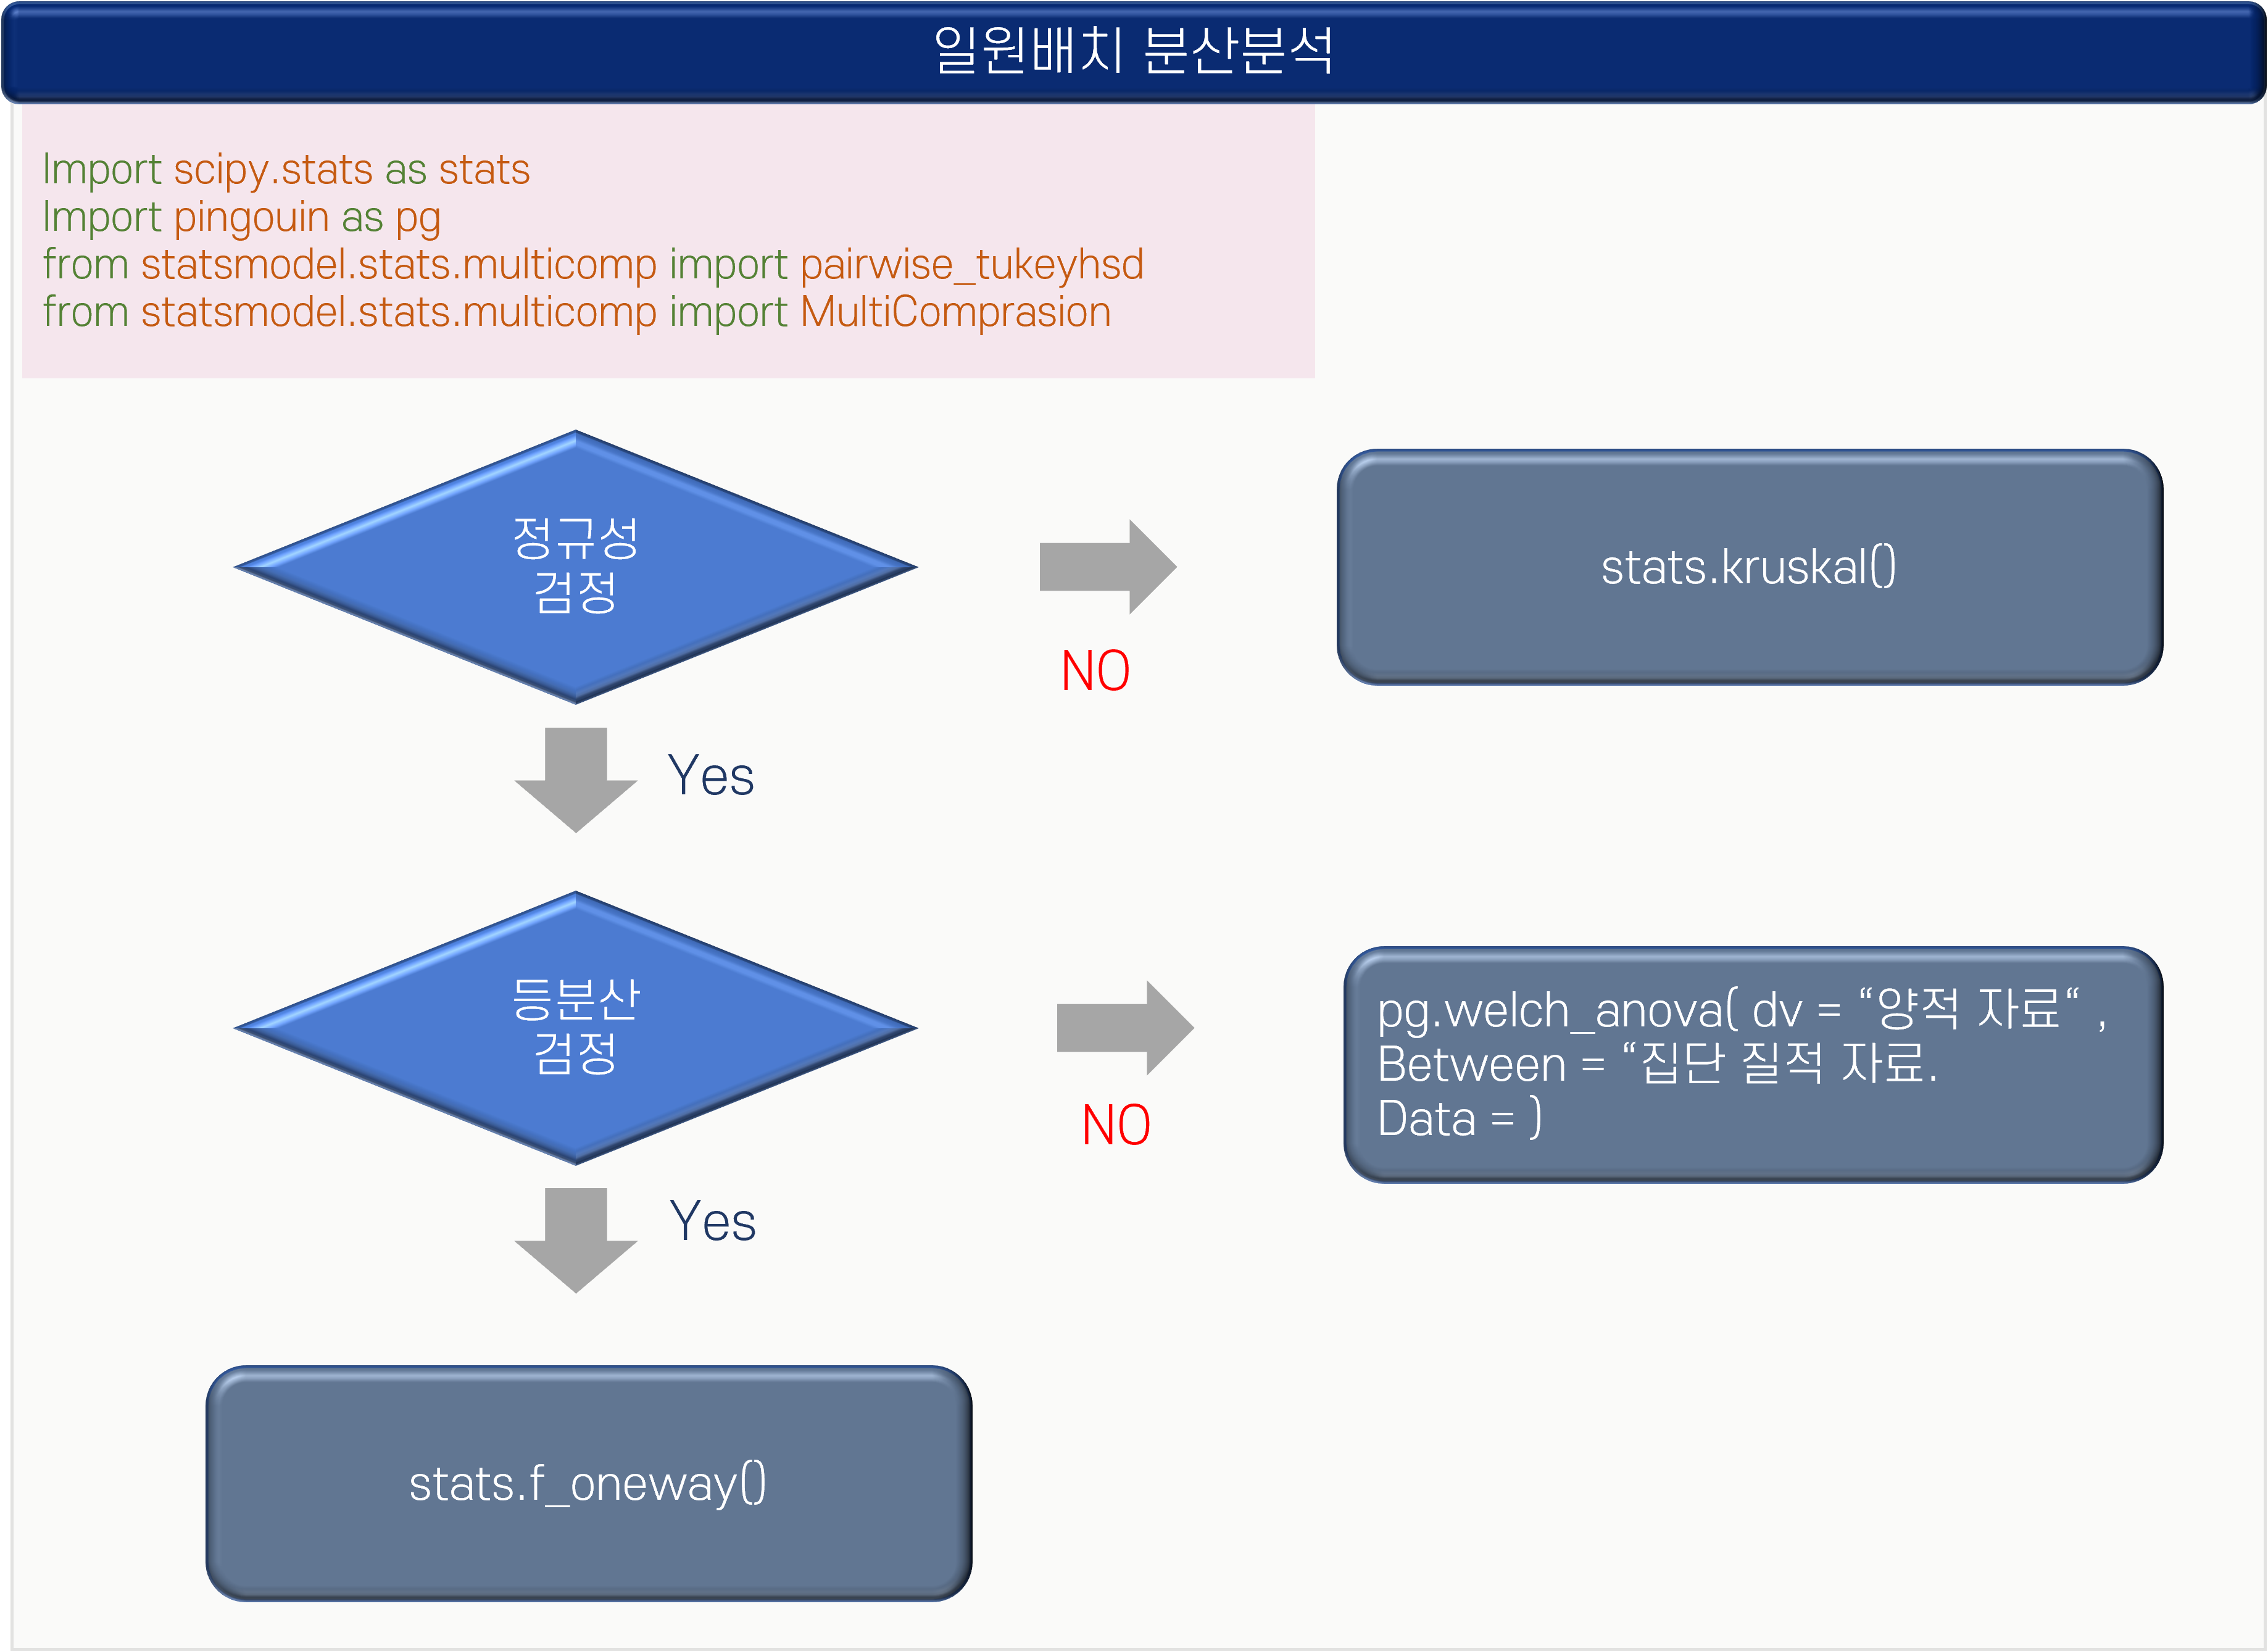

#### 2.2.6 일원 배치 분산분석 실습
+ Python 에 내장되어 있는 iris 데이터를 이용하여 종(Species)별로 꽃받침의 폭(Sepal.Width)의 평균이 같은지, 차이가 있는지 확인하기 위해 일원배치 분산분석을 수행해보자.
+ 검정을 수행하기에 앞서 설정할 수 있는 다음과 같다.
+ 귀무가설(H0) : 세 가지 종에 대해 Sepal.Width 의 평균은 모두 같다.
+ 대립가설(H1) : not H0

In [1]:
import scipy.stats as stats
import pandas as pd

iris = pd.read_csv('https://raw.githubusercontent.com/phong0104/Alex_Lee_SNU_EduTech/9e65152ae7b230d9c940d03dbdc9e468f69cf426/Certificate/(2)%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%20%EC%A0%84%EB%AC%B8%EA%B0%80%20%EC%8B%A4%EA%B8%B0/Ver.2/data/iris.csv')
iris.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
iris.target.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [3]:
iris.target.value_counts()

target
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [10]:
import warnings
warnings.filterwarnings(action = 'ignore')

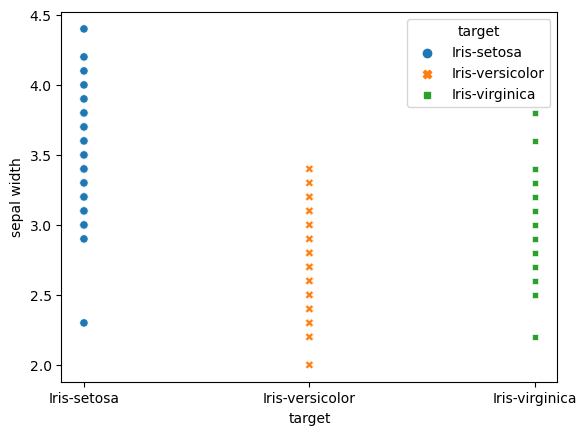

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x= 'target', y = 'sepal width', data = iris, hue = 'target', style = 'target')
plt.show()

In [17]:
target_list = iris.target.unique()
target_list

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
setosa = iris[iris.target == target_list[0]]['sepal width']
versicolor = iris[iris.target == target_list[1]]['sepal width']
virginica = iris[iris.target == target_list[2]]['sepal width']

정규성 검정

ShapiroResult(statistic=0.9686915278434753, pvalue=0.20464898645877838)
ShapiroResult(statistic=0.9741329550743103, pvalue=0.3379843533039093)
ShapiroResult(statistic=0.9673907160758972, pvalue=0.18089871108531952)


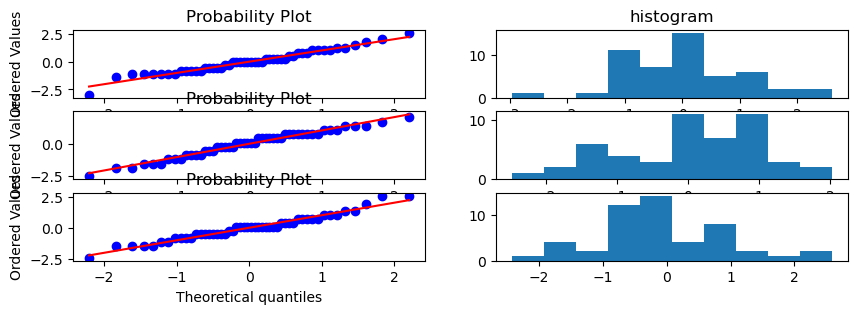

In [51]:
from scipy.stats import shapiro, zscore, probplot
# H0 : 분포가 정규성을 만족함    vs    H1 : 분포가 정규성을 만족하지 않음

print(shapiro(setosa))
print(shapiro(versicolor))
print(shapiro(virginica))

# 모두 귀무가설을 기각할 수 없다. 즉 정규성을 만족한다.

import matplotlib.pyplot as plt
zsetosa = zscore(setosa)
fig, ax = plt.subplots(3,2, figsize = (10, 3))
ax[0,0].set_title('QQ plot')
ax[0,1].set_title('histogram')

for i in range(3):
    data_list = [setosa, versicolor, virginica]
    zdata = zscore(data_list[i])
    (osm, odr), (slope, intercept, r) = probplot(zdata, plot = ax[i,0])
    ax[i,1].hist(zdata)

등분산성 검정
+ 정규성을 만족하는 샘플 : Bartlett 검정
+ 정규성을 만족하는지 확실하지 않은 샘플 : levene 검정

In [26]:
from scipy.stats import levene
# H0 : 분포가 등분산성을 만족함    vs    H1 : 분포가 등분산성을 만족하지 않음

levene(setosa, versicolor, virginica)

# 귀무가설을 기각할 수 없다. 즉 등분산성을 만족한다.
# 등분산성 검정 했으니 ANOVA 분석 시행

LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)

In [27]:
from scipy.stats import f_oneway
# H0 : 3개의 집단의 평균은 모두 같다.    vs      H1 : 3개의 집단의 평균이 모두 같지는 않다.

f_oneway(setosa, versicolor, virginica)

# 귀무가설을 기각. 즉 세 집단의 평균은 모두 같지는 않다.

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

사후검정
+ 정규성 만족, 등분산성 만족, 샘플 사이즈 동일 - Turkey HSD
+ 정규성 만족, 등분산성 만족, 샘플 사이즈 동일하지 않음 - Bonferroni, Turkey HSD

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
     group1          group2     meandiff p-adj  lower   upper  reject
---------------------------------------------------------------------
    Iris-setosa Iris-versicolor   -0.648   0.0 -0.8092 -0.4868   True
    Iris-setosa  Iris-virginica   -0.444   0.0 -0.6052 -0.2828   True
Iris-versicolor  Iris-virginica    0.204 0.009  0.0428  0.3652   True
---------------------------------------------------------------------
Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.02, alphacBonf=0.017
     group1          group2       stat   pval  pval_corr reject
---------------------------------------------------------------
    Iris-setosa Iris-versicolor  9.2828    0.0       0.0   True
    Iris-setosa  Iris-virginica  6.2894    0.0       0.0   True
Iris-versicolor  Iris-virginica -3.2058 0.0018    0.0055   True
---------------------------------------------------------------


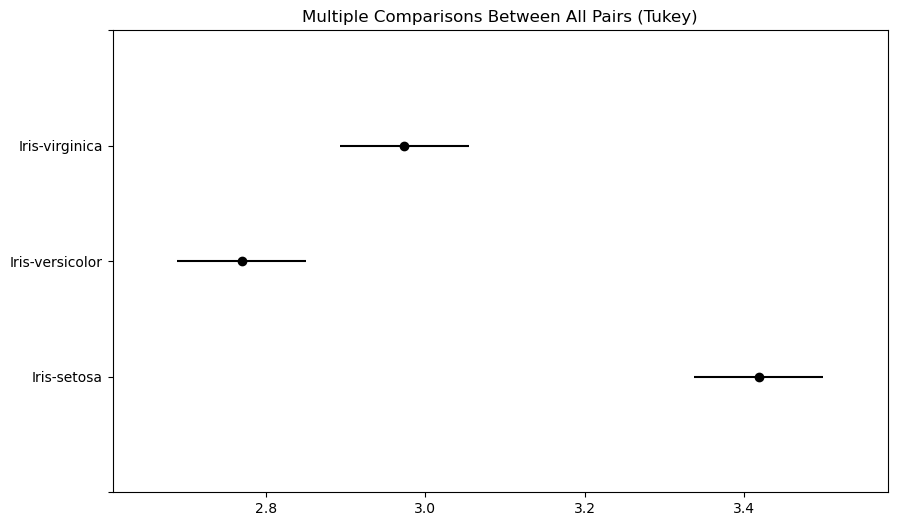

In [52]:
# 세 가지 종들 중 톡히 어떤 종들이 꽃받침의 폭에 차이가 있는지 파악하기 위해 사후검정을 수행하자.
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from scipy.stats import ttest_ind

mc = MultiComparison(data = iris['sepal width'], groups = iris.target).tukeyhsd(alpha = 0.05)
mc2 = MultiComparison(data = iris['sepal width'], groups = iris.target).allpairtest(testfunc= ttest_ind, method = 'bonf')

print(mc)
print(mc2[0])

mc.plot_simultaneous()
plt.show()

사후분석
- 귀무가설 : 집단들 사이의 평균은 같다.
- 대립가설 : 집단들 사이의 평균은 같지 않다.
- 모든 집단 수준에 대해 두 집단씩 짝을 지어 각각 다중 비교를 수행한다.

[결과 해석]
+ 모든 다중 비교에서 수정된 p 값이 0.05보다 작으므로 귀무가설을 기각한다. 즉 모든 종의 sepal width 평균은 통계적으로 유의미한 차이가 있다.

#### 2.2.7 추가 함수 사용방법(정규성 만족X, 등분산성 만족X)


__정규성을 만족하지 않을 때__

In [53]:
from scipy.stats import kruskal
kruskal(setosa, versicolor, virginica)

KruskalResult(statistic=62.49463010053111, pvalue=2.6882119006774528e-14)

[결과 해석]
+ p값이 0.05보다 작으므로 귀무가설 기각한다. 즉 3가지 종류의 꽃받침 길이의 평균이 다른 것이 존재한다.

__등분산성을 만족하지 않을 때__

In [ ]:
# !pip install pingouin

In [55]:
import pingouin as pg
pg.welch_anova(data = iris, dv = 'sepal width', between = 'target')

,Source,ddof1,ddof2,F,p-unc,np2
0,target,2,97.369597,43.303381,3.519723e-14,0.391881


[결과 해석]
+ p값이 0.05보다 작으므로 귀무가설을 기각한다. 즉 3가지 종의 꽃받침 길이의 평균이 적어도 한 개는 다르다.

In [75]:
# 등분산성을 만족하지 않을 때 사후분석
data = pd.DataFrame([setosa.values,versicolor.values, virginica.values], index = ['setosa', 'versicolor', 'virginica']).T
org_data = data.melt()
gw = pg.pairwise_gameshowell(dv = 'value', between = 'variable', data = org_data)
gw

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,setosa,versicolor,3.418,2.770,0.648,0.069807,9.282773,94.525878,0.000000e+00,1.842310
1,setosa,virginica,3.418,2.974,0.444,0.070595,6.289385,95.395253,2.869269e-08,1.248226
2,versicolor,virginica,2.770,2.974,-0.204,0.063635,-3.205761,97.926827,5.129567e-03,-0.636233


[결과 해석]
+ 모든 다중 비교에서 수정된 p 값이 0.05보다 작으므로 귀무가설을 기각한다. 즉 모든 종의 sepal width 평균은 통계적으로 유의미한 차이가 있다.

### 2.3 이원배치 분산분석 (Two-way Anova)

#### 2.3.1 이원배치 분산분석의 개념
+ 분산분석에서 반응값에 대해 두 개의 범주형 변수 A,B 의 영향을 알아보기 위해 사용되는 검증 방법이다.
+ 예를 들어 성별과 학년에 따른 시험 점수의 차이에 대해 통계적으로 검정하기 위해 이원배치 분산분석을 사용할 수 있다.
+ 두 독립변수 A,B 사이에 상관관계가 있는지 살펴보고 교호작용에 대한 검증이 반드시 진행되어야 한다.

#### 2.3.2 이원배치 분산분석의 가정
+ 각 집단 측정치의 분포는 정규분포이어야 한다. (정규성)
+ 집단 간 측정치의 분산은 같다. (등분산성)

#### 2.3.3 주효과와 교호작용효과
+ 이원배치 분산분석에서는 두 개의 독립변수 값에 따르는 데이터의 주 효과와 상호작용효과에 대한 검정을 수행한다.
+ 주효과란 각각의 독립변수가 종속변수에 미치는 효과를 의미하며, 이를 검정하는 것을 주효과 검정이라 한다.
+ 교호작용효과는 여러 독립변수들의 조합이 종속변수에 주는 영향을 의미한다. 즉 교효작용효과 검정은 한 독립변수가 종속변수에 미치는 영향이 다른 독립변수의 수준에 따라 달라지는 지를 분석하는 것이다.
+ 두 독립변수 A,B 사이에 상관관계가 존재할 경우, 교호작용이 있다는 의미이다.
+ 교호작용이 없을 경우, 주효과 검정을 진행한다. 반면 교호작용이 있을 경우에는 검정이 무의미하다.

#### 2.3.4 가설 검정

총 3개의 통계적 가설이 필요하다.
1. 첫 번째 변수 A에 대한 가설
>H0 : A 변수에 따른 종속변수의 값에 차이가 없다.  
H1 : not H0

2. 두 번째 변수 B에 대한 가설
>H0 : B 변수에 따른 종속변수의 값에 차이가 없다.  
H1 : not H0

3. 교호작용에 대한 가설
>H0 : A 변수와 B 변수 사이에 교호작용이 없다.  
H1 : not H0

#### 2.3.5 Python 을 활용한 이원배치 분산분석
> 함수 사용법 Python으로 양방향 ANOVA를 수행하는 쉬운 방법이 있습니다.  
많은 R 패키지와 유사한 모델 표기법을 가진 Statsmodel을 사용할 수 있습니다.  
모델의 공식화부터 시작합니다.

- formula = 'len ~ C(supp) + C(dose) + C(supp):C(dose)'
- model = ols(formula, data).fit()
- aov_table = anova_lm(model, typ = 2)

> statsmodels를 사용하면 좋은 점은 진단도 할 수 있다는 것입니다. 예를 들어 모델 피팅 (OLS 방법이 적용된 선형 모델)을 취하고 Quantile-Quantile (QQplot)을 얻는 것은 매우 쉽습니다.

- res = model.resid
- fig = sm.qqplot(res, line='s')
- plt.show()

#### 2.3.6 이원배치 분산분석 실습

Python에 내장된 mtcars 데이터는 32개의 차종에 대한 다양한 특성과 단위 연료당 주행거리를 담고 있다. <br>
am변수는 변속기 종류이며, cyl변수는 실린더 개수를 의미한다. 데이터를 분석에 적절한 형태로 처리한 후, <br>변속기 종류(am변수)와 실린더 개수(cyl)에 따라 주행거리(mpg변수) 평균에 유의미한 차이가 존재하는지 <br>이원 분산분석을 수행하고, 그 결과를 해석해보자

__가설 설정__

가. 상호작용효과 검정에 대한 가설
+ H0 : 변속기 종류와 실린더 개수 간에는 상효작용 효과가 없다.
+ H1 : 변속기 종류와 실린더 개수 간에는 상호작용 효과가 있다.

나. 주효과 검정에 대한 가설
+ H0 : 실린더 개수에 따른 주행거리 차이는 존재하지 않는다.
+ H1 : 실린더 개수에 따른 주행거리 차이는 존재한다.
<br/><br/>
+ H0 : 변속기 종류에 따른 주행거리 차이는 존재하지 않는다.
+ H1 : 변속기 종류에 따른 주행거리 차이는 존재한다.

In [77]:
mtcars = pd.read_csv('https://raw.githubusercontent.com/phong0104/Alex_Lee_SNU_EduTech/9e65152ae7b230d9c940d03dbdc9e468f69cf426/Certificate/(2)%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%20%EC%A0%84%EB%AC%B8%EA%B0%80%20%EC%8B%A4%EA%B8%B0/Ver.2/data/mtcars.csv')
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [78]:
# cyl, am, mpg 변수들로만 구성된 데이터 셋 생성
mtcars = mtcars[['cyl','am','mpg']]
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cyl     32 non-null     int64  
 1   am      32 non-null     int64  
 2   mpg     32 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 900.0 bytes


In [84]:
print(mtcars.cyl.unique())
print(mtcars.am.unique())
print(mtcars.mpg.unique())

[6 4 8]
[1 0]
[21.  22.8 21.4 18.7 18.1 14.3 24.4 19.2 17.8 16.4 17.3 15.2 10.4 14.7
 32.4 30.4 33.9 21.5 15.5 13.3 27.3 26.  15.8 19.7 15. ]


In [85]:
cyl = mtcars.cyl
am = mtcars.am
mpg = mtcars.mpg

__정규성 검정__

In [88]:
from scipy.stats import shapiro

print(shapiro(cyl))
print(shapiro(am))
print(shapiro(mpg))

# mpg 는 정규성 만족 cyl, am 은 정규성 만족하지 않음
# cyl과 am 은 범주형 변수

ShapiroResult(statistic=0.7533102035522461, pvalue=6.058378858142532e-06)
ShapiroResult(statistic=0.6250743865966797, pvalue=7.836341353595344e-08)
ShapiroResult(statistic=0.9475648403167725, pvalue=0.1228824257850647)


__등분산성 검정__

In [89]:
data1 = mtcars[(mtcars.am == 0) & (mtcars.cyl == 4)].mpg
data2 = mtcars[(mtcars.am == 0) & (mtcars.cyl == 6)].mpg
data3 = mtcars[(mtcars.am == 0) & (mtcars.cyl == 8)].mpg
data4 = mtcars[(mtcars.am == 1) & (mtcars.cyl == 4)].mpg
data5 = mtcars[(mtcars.am == 1) & (mtcars.cyl == 6)].mpg
data6 = mtcars[(mtcars.am == 1) & (mtcars.cyl == 8)].mpg

In [90]:
import scipy.stats as stats
stats.levene(data1, data2, data3, data4, data5, data6)

LeveneResult(statistic=2.735991909675646, pvalue=0.04086062802220418)

__분산분석 수행__

In [93]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'mpg ~C(cyl)*C(am)' # mpg ~ C(cyl) + C(am) + C(cyl):C(am)' 왼쪽의 공식과 동일
model = ols(formula, mtcars).fit()
aov_table = anova_lm(model, typ = 2)
aov_table

,sum_sq,df,F,PR(>F)
C(cyl),456.400921,2.0,24.819011,9.354735e-07
C(am),36.766919,1.0,3.998759,5.608373e-02
C(cyl):C(am),25.436511,2.0,1.383233,2.686140e-01
Residual,239.059167,26.0,NaN,NaN


[결과 해석]
+ cyl 변수에 대한 p-value 는 0.05보다 작으므로, 주효과 검정에서 귀무가설을 기각한다. 즉 실린더 개수에 따라 주행거리 평균의 차이는 존재한다.
+ am 변수에 대한 pvalue 는 0.05보다 크므로 주효과 검정에서 귀무가설을 기각하지 않는다. 즉 변속기 종류에 따른 주행거리 평균의 차이는 존재하지 않는다.
+ cyl 변수와 am 변수 간의 상호작용 효과에 대한 검정결과 pvalue 가 0.05보다 크므로 귀무가설을 기각하지 않는다. 즉 교호작용이 존재하지 않는다.

Q2. 실린더 개수와 변속기 종류 사이에 상호작용 효과가 있는지 시각화 주는 상호 작용 그래프를 그린 후 해석해보자.

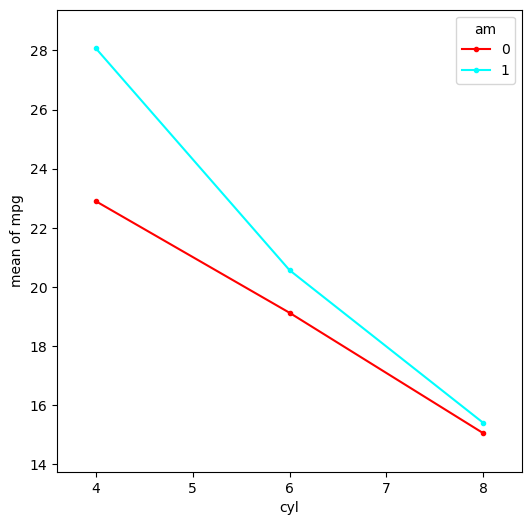

In [94]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (6,6))
fig = interaction_plot(cyl, am, mpg, ax = ax)

+ 최우선으로 aov_table 값으로 교호작용의 유의성을 판단한다.
+ cyl와 am 사이에는 상호작용이 없다.
+ 일반적으로 상호작용 그래프에서 두 선이 서로 교차하고 있을 시 x 축에 있는 독립변수와 그래프에서 시각화된 독립변수 간에는 상호작용이 존재한다고 해석할 수 있다.

In [105]:
mtcars[['cyl', 'am']].corr()

,cyl,am
cyl,1.000000,-0.522607
am,-0.522607,1.000000
